In [11]:
import matplotlib.pyplot as plt
import numpy as np

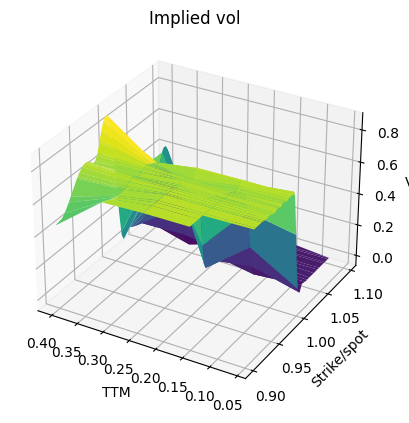

In [142]:
import pandas as pd
from scipy.interpolate import griddata

prefix = 'convex_'

march_df = pd.read_csv(f'surface/{prefix}28_03_24_v2.csv')
april_df = pd.read_csv(f'surface/{prefix}30_04_24_v2.csv')
may_df = pd.read_csv(f'surface/{prefix}31_05_24_v2.csv')
june_df = pd.read_csv(f'surface/{prefix}28_06_24_v2.csv')
july_df = pd.read_csv(f'surface/{prefix}31_07_24_v2.csv')

# march_df = pd.read_csv(f'surface/{prefix}28_03_24.csv')
# april_df = pd.read_csv(f'surface/{prefix}30_04_24.csv')
# may_df = pd.read_csv(f'surface/{prefix}31_05_24.csv')
# june_df = pd.read_csv(f'surface/{prefix}28_06_24.csv')
# july_df = pd.read_csv(f'surface/{prefix}31_07_24.csv')


ttms = np.array([march_df.loc[0, 'ttm'], april_df.loc[0, 'ttm'], may_df.loc[0, 'ttm'], june_df.loc[0, 'ttm'], july_df.loc[0, 'ttm']])

march_df['strike_spot_ratio'] = 1 / march_df['spot_strike_ratio']
april_df['strike_spot_ratio'] = 1 / april_df['spot_strike_ratio']
may_df['strike_spot_ratio'] = 1 / may_df['spot_strike_ratio']
june_df['strike_spot_ratio'] = 1 / june_df['spot_strike_ratio']
july_df['strike_spot_ratio'] = 1 / july_df['spot_strike_ratio']

strikes = {
    'March': march_df,
    'April': april_df,
    'May': may_df,
    'June': june_df,
    'July': july_df,
}

unique_strikes = set(pd.concat([march_df['strike_spot_ratio'], april_df['strike_spot_ratio'], may_df['strike_spot_ratio'], june_df['strike_spot_ratio'], july_df['strike_spot_ratio']]))

unique_strikes = np.array(sorted(list(unique_strikes)))
unique_strikes = unique_strikes[unique_strikes < 1.1]
unique_strikes = unique_strikes[unique_strikes > 0.9]

grids = []
for month, df in strikes.items():
    new_grid = griddata((df['strike_spot_ratio'].to_numpy(),), df['predicted_vol'].to_numpy(), (unique_strikes,), method='cubic')
    grids.append(new_grid)

X_grid, Y_grid = np.meshgrid(ttms, unique_strikes)
vols = np.vstack(grids).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.invert_xaxis()

ax.plot_surface(X_grid, Y_grid, vols, cmap='viridis')

ax.set_xlabel('TTM')
ax.set_ylabel('Strike/spot')
ax.set_zlabel('Vol')

ax.set_title('Implied vol')

plt.show()

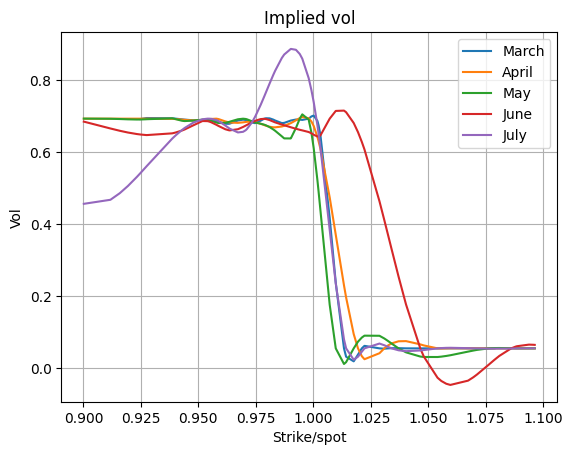

In [143]:
for i, grid in enumerate(grids):
    plt.plot(unique_strikes, grid, label=list(strikes.keys())[i])

plt.grid()
plt.xlabel('Strike/spot')
plt.ylabel('Vol')
plt.title('Implied vol')
plt.legend()

plt.savefig('1.jpg')

In [85]:
# WTI OIL

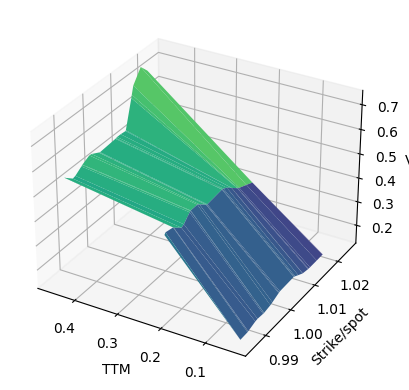

In [95]:
import pandas as pd
from scipy.interpolate import griddata

march_df = pd.read_csv('surface/cme_data_v2.csv')
april_df = pd.read_csv('surface/cme_data_v3.csv')
may_df = pd.read_csv('surface/cme_data_v4.csv')


ttms = np.array([march_df.loc[0, 'ttm'], april_df.loc[0, 'ttm'], may_df.loc[0, 'ttm']])

march_df['strike_spot_ratio'] = 1 / march_df['spot_strike_ratio']
april_df['strike_spot_ratio'] = 1 / april_df['spot_strike_ratio']
may_df['strike_spot_ratio'] = 1 / may_df['spot_strike_ratio']

strikes = [
    march_df,
    april_df,
    may_df,
]

months = [
    'March', 'April', 'May'
]

unique_strikes = set(pd.concat([march_df['strike_spot_ratio'], april_df['strike_spot_ratio'], may_df['strike_spot_ratio']]))

unique_strikes = np.array(sorted(list(unique_strikes)))
unique_strikes = unique_strikes[unique_strikes < 1.15]

grids = []
for df in strikes:
    new_grid = griddata((df['strike_spot_ratio'].to_numpy(),), df['predicted_vol'].to_numpy(), (unique_strikes,), method='cubic')
    grids.append(new_grid)

X_grid, Y_grid = np.meshgrid(ttms, unique_strikes)
vols = np.vstack(grids).T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.invert_xaxis()

ax.plot_surface(X_grid, Y_grid, vols, cmap='viridis')

ax.set_xlabel('TTM')
ax.set_ylabel('Strike/spot')
ax.set_zlabel('Vol')

plt.show()

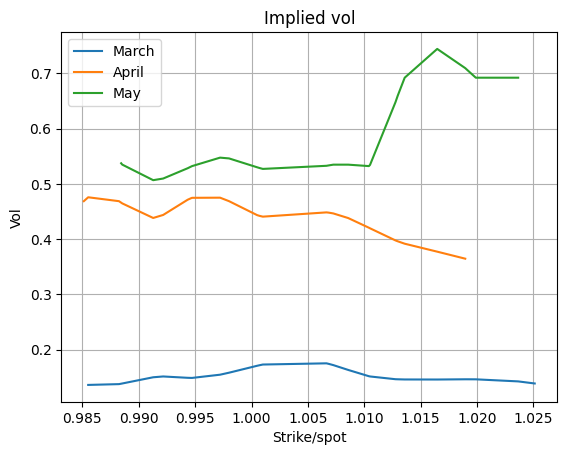

In [96]:
for i, grid in enumerate(grids):
    plt.plot(unique_strikes[unique_strikes < 1.15], grid[unique_strikes < 1.15], label=months[i])

plt.grid()
plt.xlabel('Strike/spot')
plt.ylabel('Vol')
plt.title('Implied vol')
plt.legend()